In [52]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

fine_grained_evaluation = pd.read_pickle("/mnt/nfs/work1/llcao/zhiyilai/reranking_LM/results/baseline_wiki2021/canNUM100_not_repeat_candidate/40000/fg_eval.pkl")

fine_grained_evaluation.head()

,rerank_logits,normal_logits,ground_true_difficulty_level,rerank_loss,normal_loss,ground_true,inputs_text,candidate_tokens,entropy_difficulty_level
0,"[-0.31323760747909546, -0.3514552414417267, -0...","[7.288956165313721, 7.029998302459717, 6.89305...",0,1.407344,1.353590,.,blacksmith's workshop,"[., in, ,, at, and, with, on, for, was,...",1.074903
1,"[0.5781433582305908, -0.4996368885040283, 0.32...","[8.005743980407715, 6.383976459503174, 6.17348...",17,5.758543,5.490301,when,"high school, back","[ in, at, to, on, home, with, -, and, i...",0.891999
2,"[-0.6205261945724487, -1.2617223262786865, -1....","[5.97537899017334, 4.827922344207764, 4.663620...",0,1.681026,1.508302,was,mys. The documentary,"[ was, is, ,, "", also, 's, has, series, ...",1.582223
3,"[1.8851970434188843, 0.2747272849082947, -2.11...","[10.446430206298828, 7.063143730163574, 4.2140...",0,0.227486,0.041986,II,blacksmith's workshop.His company expanded in...,"[ II, I, One, 2, Two, 1, III, 3, 4, t...",0.094869
4,"[1.748606562614441, -0.38535428047180176, -0.5...","[8.950237274169922, 6.9351067543029785, 5.7370...",1,2.418952,2.248357,in,mys. The documentary was also awarded a 2010 P...,"[., in, from, and, ."", of, ,, that, on, ...",0.406286


In [53]:
fine_grained_evaluation.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 157732 entries, 0 to 157731
Data columns (total 9 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   rerank_logits                 157732 non-null  object 
 1   normal_logits                 157732 non-null  object 
 2   ground_true_difficulty_level  157732 non-null  int64  
 3   rerank_loss                   157732 non-null  float64
 4   normal_loss                   157732 non-null  float64
 5   ground_true                   157732 non-null  object 
 6   inputs_text                   157732 non-null  object 
 7   candidate_tokens              157732 non-null  object 
 8   entropy_difficulty_level      157732 non-null  float64
dtypes: float64(3), int64(1), object(5)
memory usage: 10.8+ MB


# visulization
### please help me add some other visulization if you want

<AxesSubplot:ylabel='Frequency'>

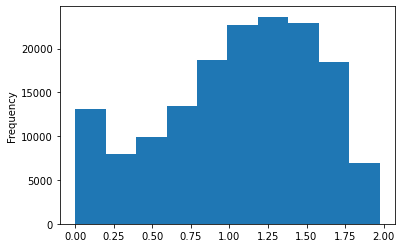

In [54]:
fine_grained_evaluation['entropy_difficulty_level'].plot(kind='hist')

<AxesSubplot:ylabel='Frequency'>

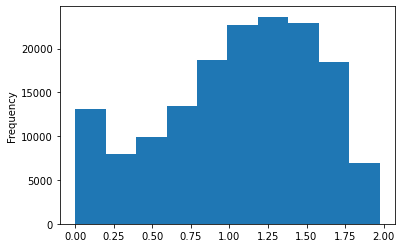

In [55]:
fine_grained_evaluation['entropy_difficulty_level'].plot(kind='hist')

<AxesSubplot:ylabel='Frequency'>

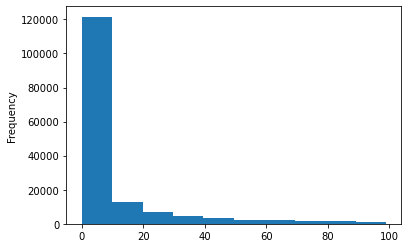

In [56]:
fine_grained_evaluation['ground_true_difficulty_level'].plot(kind='hist')

Text(0, 0.5, 'rerank_loss')

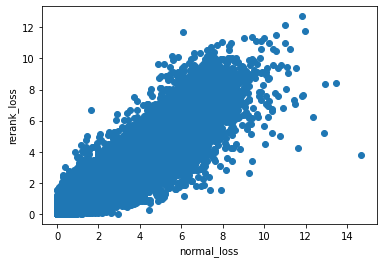

In [57]:
plt.scatter(fine_grained_evaluation['normal_loss'], fine_grained_evaluation['rerank_loss'])
plt.xlabel("normal_loss")
plt.ylabel("rerank_loss")

Text(0, 0.5, 'entropy_difficulty_level')

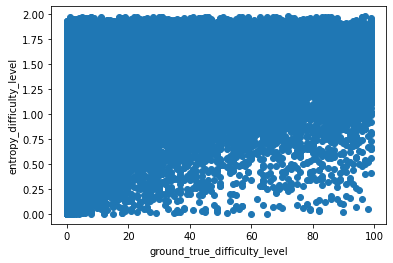

In [58]:
plt.scatter(fine_grained_evaluation['ground_true_difficulty_level'], fine_grained_evaluation['entropy_difficulty_level'])
plt.xlabel("ground_true_difficulty_level")
plt.ylabel("entropy_difficulty_level")


### entropy_difficulty_level VS normal_loss
### entropy_difficulty_level VS rerank_loss

Text(0, 0.5, 'normal_loss')

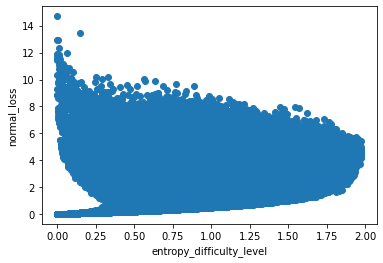

In [59]:
# import matplotlib as mpl
# mpl.rcParams['agg.path.chunksize'] = 200000
plt.scatter(fine_grained_evaluation['entropy_difficulty_level'], fine_grained_evaluation['normal_loss'])
plt.xlabel("entropy_difficulty_level")
plt.ylabel("normal_loss")

Text(0, 0.5, 'rerank_loss')

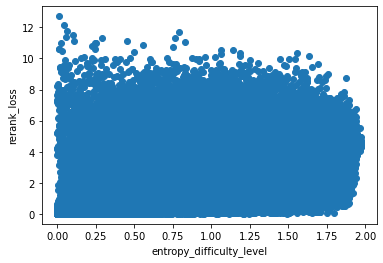

In [60]:
plt.scatter(fine_grained_evaluation['entropy_difficulty_level'], fine_grained_evaluation['rerank_loss'])
plt.xlabel("entropy_difficulty_level")
plt.ylabel("rerank_loss")

### so some important points for last two figures:

#### 1. if the entropy_difficulty_level is vely low (close to 0), which means gpt2 is very confident in these cases, actually it will make some stupid mistakes (some high normal loss). For these stupid mistakes, obviously reranker did better.

#### 2. if the entropy_difficulty_level is vely low, which means gpt2 is very confident in this cases, it did well at most of time (most of them are super-low normal loss). For these cases, seems reranker was not so great. We can see it exlargered some loss for these cases.

#### 3. The cases in 2 are much more than the cases in 1 (I showed it below). So I think original gpt2 did better during low entropy_difficulty_level.

#### 4. if the entropy_difficulty_level is vely high (close to 0.7), which means gpt2 feels ambigious for these cases, its normal_loss are usually around 1.5-2.5, while its rerank_loss are usually 0-4. So it exlargered some cases' loss, at the same time it decrease some other cases' loss. However, the second kind of cases are more than the first kind of cases. So I think reranker did better during large entropy_difficulty_level.

### very easy cases and very hard cases (maybe we name them gpt2 low/high confidence cases?)

In [61]:
very_easy_cases = fine_grained_evaluation[fine_grained_evaluation["entropy_difficulty_level"] < 0.1]
very_hard_cases = fine_grained_evaluation[fine_grained_evaluation["entropy_difficulty_level"] > 1.75]

In [62]:
print(very_easy_cases.shape)
very_easy_cases.head()

(9037, 9)


,rerank_logits,normal_logits,ground_true_difficulty_level,rerank_loss,normal_loss,ground_true,inputs_text,candidate_tokens,entropy_difficulty_level
3,"[1.8851970434188843, 0.2747272849082947, -2.11...","[10.446430206298828, 7.063143730163574, 4.2140...",0,0.227486,0.041986,II,blacksmith's workshop.His company expanded in...,"[ II, I, One, 2, Two, 1, III, 3, 4, t...",0.094869
17,"[5.703825950622559, -1.731456995010376, -3.907...","[10.906904220581055, 2.630750894546509, 2.5953...",0,0.001582,0.002240,of,mys. The documentary was also awarded a 2010 P...,"[ of, only, to, in, ,, at, and, from, w...",0.010577
29,"[2.325869083404541, -2.8743410110473633, -8.44...","[13.1769380569458, 7.067440509796143, 5.628316...",0,0.012454,0.007951,ower,mys. The documentary was also awarded a 2010 P...,"[ower, owers, Circle, Power, power, ow, ., u...",0.032600
30,"[4.24450159072876, -1.0939359664916992, -2.176...","[10.687542915344238, 4.613846778869629, 4.4979...",0,0.011237,0.016941,of,", the school's band students were selected to ...","[ of, among, "", to, that, in, for, wher...",0.061752
77,"[3.9824771881103516, -0.9726418852806091, -2.7...","[8.8805570602417, 3.4145359992980957, 1.525724...",0,0.013640,0.007078,with,V) with negligible charge separation loss. Thi...,"[ with, the, to, a, in, ., for, ,, which...",0.024397


In [63]:
print(very_hard_cases.shape)
very_hard_cases.head()

(9038, 9)


,rerank_logits,normal_logits,ground_true_difficulty_level,rerank_loss,normal_loss,ground_true,inputs_text,candidate_tokens,entropy_difficulty_level
15,"[-0.6934142708778381, -1.4626562595367432, -3....","[4.802480697631836, 4.389768123626709, 4.33284...",55,5.948905,5.164661,town,blacksmith's workshop.His company expanded in...,"[ company, development, local, future, env...",1.850556
23,"[-0.5905141830444336, -2.5446155071258545, -1....","[5.1308913230896, 4.791731357574463, 4.3057980...",66,5.963027,5.353002,R,mys. The documentary was also awarded a 2010 P...,"[ River, Foundation, family, -, ,, Valley, ...",1.841608
56,"[-2.251896619796753, -2.0954713821411133, -1.7...","[4.025280475616455, 3.8301987648010254, 3.5794...",35,4.682738,4.748627,White,mys. The documentary was also awarded a 2010 P...,"[ Mount, Great, South, Gold, Mountain, Bl...",1.899341
65,"[-1.4145162105560303, -2.031649351119995, -3.0...","[4.686250686645508, 4.317398548126221, 4.29532...",60,5.742875,5.394445,k,with temperature of kBCAr:,"[The, "", K, The, In, K, C, N, R, A, (, P,...",1.770787
80,"[-1.7239644527435303, -3.101919174194336, -3.1...","[6.07850456237793, 5.993066310882568, 5.863473...",2,2.999878,2.713725,rad,V) with negligible charge separation loss. Thi...,"[linear, chemical, rad, natural, c, static, im...",1.815952


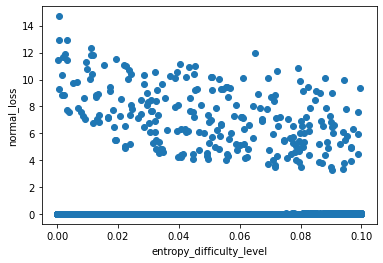

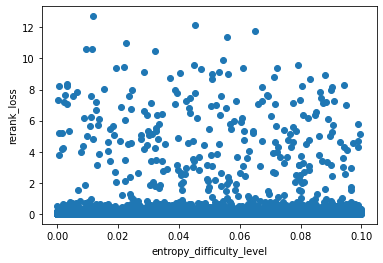

In [64]:
plt.scatter(very_easy_cases['entropy_difficulty_level'], very_easy_cases['normal_loss'])
plt.xlabel("entropy_difficulty_level")
plt.ylabel("normal_loss")
plt.show()


plt.scatter(very_easy_cases['entropy_difficulty_level'], very_easy_cases['rerank_loss'])
plt.xlabel("entropy_difficulty_level")
plt.ylabel("rerank_loss")
plt.show()

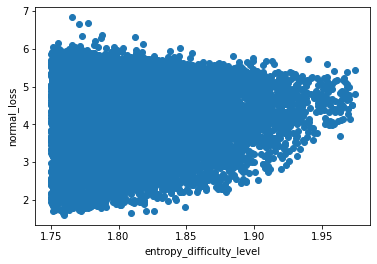

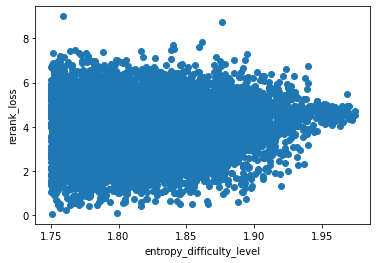

In [65]:
# import matplotlib as mpl
# mpl.rcParams['agg.path.chunksize'] = 200000
plt.scatter(very_hard_cases['entropy_difficulty_level'], very_hard_cases['normal_loss'])
plt.xlabel("entropy_difficulty_level")
plt.ylabel("normal_loss")

plt.show()

plt.scatter(very_hard_cases['entropy_difficulty_level'], very_hard_cases['rerank_loss'])
plt.xlabel("entropy_difficulty_level")
plt.ylabel("rerank_loss")

plt.show()

## Decile
#### find the decile (https://en.wikipedia.org/wiki/Decile) on the entropy difficulty and average the loss within each of 10 bins and compare the 10 average losses of the 1st stage prediction and 2nd stage prediction

In [66]:
import pandas as pd 
import numpy as np 

fine_grained_evaluation["Decile_for_entropy_difficulty_level"] = pd.qcut(fine_grained_evaluation['entropy_difficulty_level'], 10,
       labels=[0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

for i in range(10):
    this_level = fine_grained_evaluation[fine_grained_evaluation['Decile_for_entropy_difficulty_level'] == i]
    print("For Decile_for_entropy_difficulty_level of ", str(i))
    print("avg normal_loss:", this_level['normal_loss'].mean())
    print("avg rerank_loss:", this_level['rerank_loss'].mean())
    print()

For Decile_for_entropy_difficulty_level of  0
avg normal_loss: 0.3985686942506043
avg rerank_loss: 0.3778577127791623

For Decile_for_entropy_difficulty_level of  1
avg normal_loss: 1.181883240357048
avg rerank_loss: 1.1538274200208085

For Decile_for_entropy_difficulty_level of  2
avg normal_loss: 1.7654803521817333
avg rerank_loss: 1.731158655069881

For Decile_for_entropy_difficulty_level of  3
avg normal_loss: 2.189172128921969
avg rerank_loss: 2.148486406481832

For Decile_for_entropy_difficulty_level of  4
avg normal_loss: 2.5096024566840818
avg rerank_loss: 2.4640476715833124

For Decile_for_entropy_difficulty_level of  5
avg normal_loss: 2.772050285210117
avg rerank_loss: 2.7174514027325447

For Decile_for_entropy_difficulty_level of  6
avg normal_loss: 3.0638991030502174
avg rerank_loss: 2.9966817250563738

For Decile_for_entropy_difficulty_level of  7
avg normal_loss: 3.3615039596732657
avg rerank_loss: 3.2866023078076423

For Decile_for_entropy_difficulty_level of  8
avg nor

## Mean reciprocal rank

In [68]:
def cal_gt_value_rank_in_array(x):
    logits_array, ground_true_place = x
    array = (-1) * np.array(logits_array) #for reverse ranking
    temp = array.argsort()
    ranks = np.empty_like(temp)
    ranks[temp] = np.arange(len(array))
    return ranks[ground_true_place]

def mean_reciprocal_rank(gt_ranks, CAN_NUM=5):
    rs = []
    for i in range(len(gt_ranks)):
        tmp = np.zeros(CAN_NUM)
        tmp[gt_ranks[i]] = 1
        rs.append(tmp)
    
    rs = (np.asarray(r).nonzero()[0] for r in rs)
    return np.mean([1. / (r[0] + 1) if r.size else 0. for r in rs]) 

print("For all evaluation data:")

fine_grained_evaluation['noraml_prediction_gt_rank'] = fine_grained_evaluation[['normal_logits', 'ground_true_difficulty_level']].apply(cal_gt_value_rank_in_array, axis=1)
fine_grained_evaluation['rerank_prediction_gt_rank'] = fine_grained_evaluation[['rerank_logits', 'ground_true_difficulty_level']].apply(cal_gt_value_rank_in_array, axis=1)

print("normal MRR is ", mean_reciprocal_rank(gt_ranks=fine_grained_evaluation['noraml_prediction_gt_rank'].tolist(), CAN_NUM=100))
print("rerank MRR is ", mean_reciprocal_rank(gt_ranks=fine_grained_evaluation['rerank_prediction_gt_rank'].tolist(), CAN_NUM=100))
print()

for i in range(10):
    this_level = fine_grained_evaluation[fine_grained_evaluation['Decile_for_entropy_difficulty_level'] == i]
    print("For Decile_for_entropy_difficulty_level of ", str(i))
    print("normal MRR is ", mean_reciprocal_rank(gt_ranks=this_level['noraml_prediction_gt_rank'].tolist(), CAN_NUM=100))
    print("rerank MRR is ", mean_reciprocal_rank(gt_ranks=this_level['rerank_prediction_gt_rank'].tolist(), CAN_NUM=100))
    print()

For all evaluation data:
normal MRR is  0.5339735419176206
rerank MRR is  0.5411668070920144

For Decile_for_entropy_difficulty_level of  0
normal MRR is  0.9544835410968345
rerank MRR is  0.9551752500950773

For Decile_for_entropy_difficulty_level of  1
normal MRR is  0.8153121520277123
rerank MRR is  0.81787676226532

For Decile_for_entropy_difficulty_level of  2
normal MRR is  0.6927360318736095
rerank MRR is  0.6965781112079139

For Decile_for_entropy_difficulty_level of  3
normal MRR is  0.6000408950776748
rerank MRR is  0.6050663984538214

For Decile_for_entropy_difficulty_level of  4
normal MRR is  0.5273498868692783
rerank MRR is  0.5336258714486509

For Decile_for_entropy_difficulty_level of  5
normal MRR is  0.47230100934144376
rerank MRR is  0.48101642994458943

For Decile_for_entropy_difficulty_level of  6
normal MRR is  0.4166781817595551
rerank MRR is  0.42535067111505276

For Decile_for_entropy_difficulty_level of  7
normal MRR is  0.35402380259922045
rerank MRR is  0.36

### Do the context length pooling and upper/lowercase pooling and POS pooling on the perplexity as well

In [33]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

fine_grained_evaluation = pd.read_pickle("/mnt/nfs/work1/llcao/zhiyilai/reranking_LM/results/baseline_wiki2021/canNUM100_not_repeat_candidate/40000/fg_eval.pkl")

fine_grained_evaluation.head()

,rerank_logits,normal_logits,ground_true_difficulty_level,rerank_loss,normal_loss,ground_true,inputs_text,candidate_tokens,entropy_difficulty_level
0,"[-0.31323760747909546, -0.3514552414417267, -0...","[7.288956165313721, 7.029998302459717, 6.89305...",0,1.407344,1.353590,.,blacksmith's workshop,"[., in, ,, at, and, with, on, for, was,...",1.074903
1,"[0.5781433582305908, -0.4996368885040283, 0.32...","[8.005743980407715, 6.383976459503174, 6.17348...",17,5.758543,5.490301,when,"high school, back","[ in, at, to, on, home, with, -, and, i...",0.891999
2,"[-0.6205261945724487, -1.2617223262786865, -1....","[5.97537899017334, 4.827922344207764, 4.663620...",0,1.681026,1.508302,was,mys. The documentary,"[ was, is, ,, "", also, 's, has, series, ...",1.582223
3,"[1.8851970434188843, 0.2747272849082947, -2.11...","[10.446430206298828, 7.063143730163574, 4.2140...",0,0.227486,0.041986,II,blacksmith's workshop.His company expanded in...,"[ II, I, One, 2, Two, 1, III, 3, 4, t...",0.094869
4,"[1.748606562614441, -0.38535428047180176, -0.5...","[8.950237274169922, 6.9351067543029785, 5.7370...",1,2.418952,2.248357,in,mys. The documentary was also awarded a 2010 P...,"[., in, from, and, ."", of, ,, that, on, ...",0.406286


In [35]:
import spacy
from spacy.lang.en import English
from result_statistics import result_statistics

# nlp = English()
nlp = spacy.load("en_core_web_sm")

if_include_upper = lambda s: "upper" if any(x.isupper() for x in s) else "lower"

def pos_ground_true_token(x):
    tokens = nlp(x.strip())
    if len(tokens)==1:
        return tokens[0].pos_
    else:
        return "no applicant"

fine_grained_evaluation['ground_true_upper_lower'] = fine_grained_evaluation['ground_true'].apply(if_include_upper)
fine_grained_evaluation['ground_true_pos'] = fine_grained_evaluation['ground_true'].apply(pos_ground_true_token)

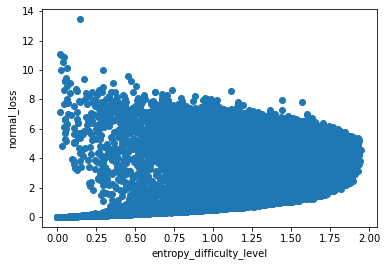

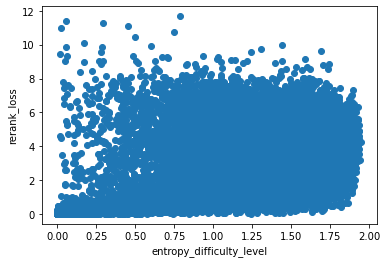

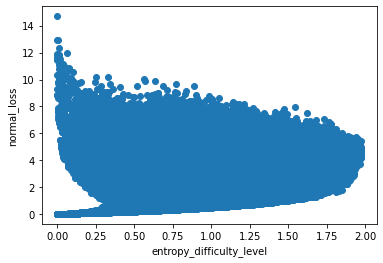

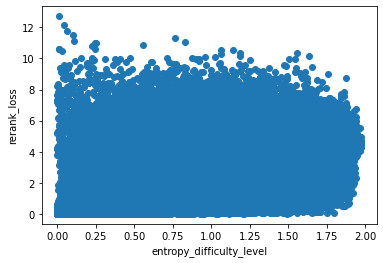

In [36]:
fine_grained_evaluation_upper = fine_grained_evaluation[fine_grained_evaluation['ground_true_upper_lower'] == "upper"]

plt.scatter(fine_grained_evaluation_upper['entropy_difficulty_level'], fine_grained_evaluation_upper['normal_loss'])
plt.xlabel("entropy_difficulty_level")
plt.ylabel("normal_loss")

plt.show()

plt.scatter(fine_grained_evaluation_upper['entropy_difficulty_level'], fine_grained_evaluation_upper['rerank_loss'])
plt.xlabel("entropy_difficulty_level")
plt.ylabel("rerank_loss")

plt.show()

fine_grained_evaluation_lower = fine_grained_evaluation[fine_grained_evaluation['ground_true_upper_lower'] == "lower"]

plt.scatter(fine_grained_evaluation_lower['entropy_difficulty_level'], fine_grained_evaluation_lower['normal_loss'])
plt.xlabel("entropy_difficulty_level")
plt.ylabel("normal_loss")

plt.show()

plt.scatter(fine_grained_evaluation_lower['entropy_difficulty_level'], fine_grained_evaluation_lower['rerank_loss'])
plt.xlabel("entropy_difficulty_level")
plt.ylabel("rerank_loss")

plt.show()

In [37]:
import pandas as pd 
import numpy as np 

print("for upper:")
fine_grained_evaluation_upper["Decile_for_entropy_difficulty_level"] = pd.qcut(fine_grained_evaluation_upper['entropy_difficulty_level'], 10,
       labels=[0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

for i in range(10):
    this_level = fine_grained_evaluation_upper[fine_grained_evaluation_upper['Decile_for_entropy_difficulty_level'] == i]
    print("For Decile_for_entropy_difficulty_level of ", str(i))
    print("avg normal_loss:", this_level['normal_loss'].mean())
    print("avg rerank_loss:", this_level['rerank_loss'].mean())
    print()
print()
print("for lower:")
fine_grained_evaluation_lower["Decile_for_entropy_difficulty_level"] = pd.qcut(fine_grained_evaluation_lower['entropy_difficulty_level'], 10,
       labels=[0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

for i in range(10):
    this_level = fine_grained_evaluation_lower[fine_grained_evaluation_lower['Decile_for_entropy_difficulty_level'] == i]
    print("For Decile_for_entropy_difficulty_level of ", str(i))
    print("avg normal_loss:", this_level['normal_loss'].mean())
    print("avg rerank_loss:", this_level['rerank_loss'].mean())
    print()

for upper:
For Decile_for_entropy_difficulty_level of  0
avg normal_loss: 0.6564878889065057
avg rerank_loss: 0.6513887155031787

For Decile_for_entropy_difficulty_level of  1
avg normal_loss: 2.3791405048626344
avg rerank_loss: 2.260677291397072

For Decile_for_entropy_difficulty_level of  2
avg normal_loss: 2.997426756402446
avg rerank_loss: 2.825555911306911

For Decile_for_entropy_difficulty_level of  3
avg normal_loss: 3.0601200768644627
avg rerank_loss: 2.930312841725847

For Decile_for_entropy_difficulty_level of  4
avg normal_loss: 3.3330537122268455
avg rerank_loss: 3.166539441509656

For Decile_for_entropy_difficulty_level of  5
avg normal_loss: 3.496706213751893
avg rerank_loss: 3.354330441267677

For Decile_for_entropy_difficulty_level of  6
avg normal_loss: 3.655177072553716
avg rerank_loss: 3.528212297903512

For Decile_for_entropy_difficulty_level of  7
avg normal_loss: 3.7659595651553754
avg rerank_loss: 3.62086971674486

For Decile_for_entropy_difficulty_level of  8
av

<ipython-input-37-2a347bac64ec>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fine_grained_evaluation_upper["Decile_for_entropy_difficulty_level"] = pd.qcut(fine_grained_evaluation_upper['entropy_difficulty_level'], 10,
<ipython-input-37-2a347bac64ec>:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fine_grained_evaluation_lower["Decile_for_entropy_difficulty_level"] = pd.qcut(fine_grained_evaluation_lower['entropy_difficulty_level'], 10,


In [38]:
def cal_gt_value_rank_in_array(x):
    logits_array, ground_true_place = x
    array = (-1) * np.array(logits_array) #for reverse ranking
    temp = array.argsort()
    ranks = np.empty_like(temp)
    ranks[temp] = np.arange(len(array))
    return ranks[ground_true_place]

def mean_reciprocal_rank(gt_ranks, CAN_NUM=5):
    rs = []
    for i in range(len(gt_ranks)):
        tmp = np.zeros(CAN_NUM)
        tmp[gt_ranks[i]] = 1
        rs.append(tmp)
    
    rs = (np.asarray(r).nonzero()[0] for r in rs)
    return np.mean([1. / (r[0] + 1) if r.size else 0. for r in rs]) 

print("For upper data:")

fine_grained_evaluation_upper['noraml_prediction_gt_rank'] = fine_grained_evaluation_upper[['normal_logits', 'ground_true_difficulty_level']].apply(cal_gt_value_rank_in_array, axis=1)
fine_grained_evaluation_upper['rerank_prediction_gt_rank'] = fine_grained_evaluation_upper[['rerank_logits', 'ground_true_difficulty_level']].apply(cal_gt_value_rank_in_array, axis=1)

print("normal MRR is ", mean_reciprocal_rank(gt_ranks=fine_grained_evaluation_upper['noraml_prediction_gt_rank'].tolist(), CAN_NUM=100))
print("rerank MRR is ", mean_reciprocal_rank(gt_ranks=fine_grained_evaluation_upper['rerank_prediction_gt_rank'].tolist(), CAN_NUM=100))
print()

for i in range(10):
    this_level = fine_grained_evaluation_upper[fine_grained_evaluation_upper['Decile_for_entropy_difficulty_level'] == i]
    print("For Decile_for_entropy_difficulty_level of ", str(i))
    print("normal MRR is ", mean_reciprocal_rank(gt_ranks=this_level['noraml_prediction_gt_rank'].tolist(), CAN_NUM=100))
    print("rerank MRR is ", mean_reciprocal_rank(gt_ranks=this_level['rerank_prediction_gt_rank'].tolist(), CAN_NUM=100))
    print()
    
print("For lower data:")

fine_grained_evaluation_lower['noraml_prediction_gt_rank'] = fine_grained_evaluation_lower[['normal_logits', 'ground_true_difficulty_level']].apply(cal_gt_value_rank_in_array, axis=1)
fine_grained_evaluation_lower['rerank_prediction_gt_rank'] = fine_grained_evaluation_lower[['rerank_logits', 'ground_true_difficulty_level']].apply(cal_gt_value_rank_in_array, axis=1)

print("normal MRR is ", mean_reciprocal_rank(gt_ranks=fine_grained_evaluation_lower['noraml_prediction_gt_rank'].tolist(), CAN_NUM=100))
print("rerank MRR is ", mean_reciprocal_rank(gt_ranks=fine_grained_evaluation_lower['rerank_prediction_gt_rank'].tolist(), CAN_NUM=100))
print()

for i in range(10):
    this_level = fine_grained_evaluation_lower[fine_grained_evaluation_lower['Decile_for_entropy_difficulty_level'] == i]
    print("For Decile_for_entropy_difficulty_level of ", str(i))
    print("normal MRR is ", mean_reciprocal_rank(gt_ranks=this_level['noraml_prediction_gt_rank'].tolist(), CAN_NUM=100))
    print("rerank MRR is ", mean_reciprocal_rank(gt_ranks=this_level['rerank_prediction_gt_rank'].tolist(), CAN_NUM=100))
    print()

For upper data:


<ipython-input-38-98688e61d789>:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fine_grained_evaluation_upper['noraml_prediction_gt_rank'] = fine_grained_evaluation_upper[['normal_logits', 'ground_true_difficulty_level']].apply(cal_gt_value_rank_in_array, axis=1)
<ipython-input-38-98688e61d789>:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fine_grained_evaluation_upper['rerank_prediction_gt_rank'] = fine_grained_evaluation_upper[['rerank_logits', 'ground_true_difficulty_level']].apply(cal_gt_value_ran

normal MRR is  0.41134960970185475
rerank MRR is  0.4251750895960516

For Decile_for_entropy_difficulty_level of  0
normal MRR is  0.9192532761439713
rerank MRR is  0.920058223844352

For Decile_for_entropy_difficulty_level of  1
normal MRR is  0.6282369513425696
rerank MRR is  0.6351983856537764

For Decile_for_entropy_difficulty_level of  2
normal MRR is  0.4765071821896221
rerank MRR is  0.4882010634601651

For Decile_for_entropy_difficulty_level of  3
normal MRR is  0.40855229640516466
rerank MRR is  0.42755733350152836

For Decile_for_entropy_difficulty_level of  4
normal MRR is  0.37877113538220697
rerank MRR is  0.3954236763203345

For Decile_for_entropy_difficulty_level of  5
normal MRR is  0.3372820301797006
rerank MRR is  0.35306458793520856

For Decile_for_entropy_difficulty_level of  6
normal MRR is  0.3013194299789594
rerank MRR is  0.3150929735335344

For Decile_for_entropy_difficulty_level of  7
normal MRR is  0.2685965863893766
rerank MRR is  0.28717028673820505

For De

<ipython-input-38-98688e61d789>:37: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fine_grained_evaluation_lower['noraml_prediction_gt_rank'] = fine_grained_evaluation_lower[['normal_logits', 'ground_true_difficulty_level']].apply(cal_gt_value_rank_in_array, axis=1)
<ipython-input-38-98688e61d789>:38: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fine_grained_evaluation_lower['rerank_prediction_gt_rank'] = fine_grained_evaluation_lower[['rerank_logits', 'ground_true_difficulty_level']].apply(cal_gt_value_ran

normal MRR is  0.5541266350972042
rerank MRR is  0.5602299038996008

For Decile_for_entropy_difficulty_level of  0
normal MRR is  0.9573491627060681
rerank MRR is  0.9581756681184148

For Decile_for_entropy_difficulty_level of  1
normal MRR is  0.8308374305983514
rerank MRR is  0.8329569406336598

For Decile_for_entropy_difficulty_level of  2
normal MRR is  0.715817673339735
rerank MRR is  0.7190847608187969

For Decile_for_entropy_difficulty_level of  3
normal MRR is  0.6281232197610143
rerank MRR is  0.6325774801460288

For Decile_for_entropy_difficulty_level of  4
normal MRR is  0.5515248462364406
rerank MRR is  0.5566676171789113

For Decile_for_entropy_difficulty_level of  5
normal MRR is  0.4990956480600334
rerank MRR is  0.5061892766263605

For Decile_for_entropy_difficulty_level of  6
normal MRR is  0.4418335474618041
rerank MRR is  0.4483458278378221

For Decile_for_entropy_difficulty_level of  7
normal MRR is  0.3799645310364387
rerank MRR is  0.38862955050778397

For Decile_

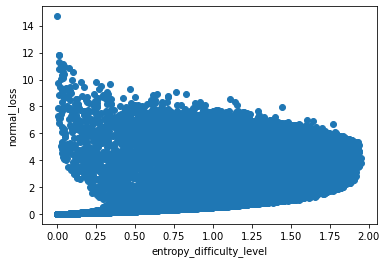

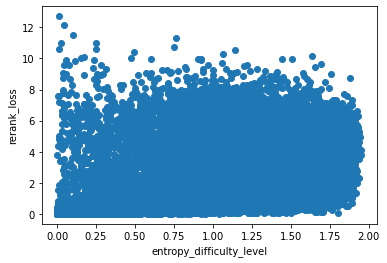

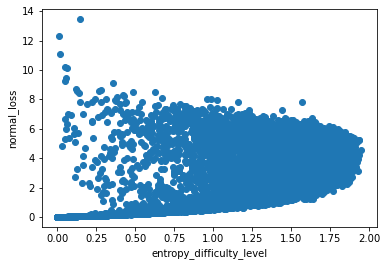

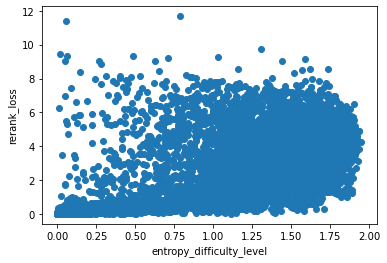

In [49]:
fine_grained_evaluation_NOUN = fine_grained_evaluation[fine_grained_evaluation['ground_true_pos'] == "NOUN"]

plt.scatter(fine_grained_evaluation_NOUN['entropy_difficulty_level'], fine_grained_evaluation_NOUN['normal_loss'])
plt.xlabel("entropy_difficulty_level")
plt.ylabel("normal_loss")

plt.show()

plt.scatter(fine_grained_evaluation_NOUN['entropy_difficulty_level'], fine_grained_evaluation_NOUN['rerank_loss'])
plt.xlabel("entropy_difficulty_level")
plt.ylabel("rerank_loss")

plt.show()

fine_grained_evaluation_PROPN = fine_grained_evaluation[fine_grained_evaluation['ground_true_pos'] == "PROPN"]

plt.scatter(fine_grained_evaluation_PROPN['entropy_difficulty_level'], fine_grained_evaluation_PROPN['normal_loss'])
plt.xlabel("entropy_difficulty_level")
plt.ylabel("normal_loss")

plt.show()

plt.scatter(fine_grained_evaluation_PROPN['entropy_difficulty_level'], fine_grained_evaluation_PROPN['rerank_loss'])
plt.xlabel("entropy_difficulty_level")
plt.ylabel("rerank_loss")

plt.show()

In [51]:
import pandas as pd 
import numpy as np 

print("for NOUN:")
fine_grained_evaluation_NOUN["Decile_for_entropy_difficulty_level"] = pd.qcut(fine_grained_evaluation_NOUN['entropy_difficulty_level'], 10,
       labels=[0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

for i in range(10):
    this_level = fine_grained_evaluation_NOUN[fine_grained_evaluation_NOUN['Decile_for_entropy_difficulty_level'] == i]
    print("For Decile_for_entropy_difficulty_level of ", str(i))
    print("avg normal_loss:", this_level['normal_loss'].mean())
    print("avg rerank_loss:", this_level['rerank_loss'].mean())
    print()
print()
print("for PROPN:")
fine_grained_evaluation_PROPN["Decile_for_entropy_difficulty_level"] = pd.qcut(fine_grained_evaluation_PROPN['entropy_difficulty_level'], 10,
       labels=[0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

for i in range(10):
    this_level = fine_grained_evaluation_PROPN[fine_grained_evaluation_PROPN['Decile_for_entropy_difficulty_level'] == i]
    print("For Decile_for_entropy_difficulty_level of ", str(i))
    print("avg normal_loss:", this_level['normal_loss'].mean())
    print("avg rerank_loss:", this_level['rerank_loss'].mean())
    print()

for NOUN:
For Decile_for_entropy_difficulty_level of  0
avg normal_loss: 0.2874893889738978
avg rerank_loss: 0.2852531810537345

For Decile_for_entropy_difficulty_level of  1
avg normal_loss: 1.1443790006071264
avg rerank_loss: 1.1134340249067305

For Decile_for_entropy_difficulty_level of  2
avg normal_loss: 2.268839827258843
avg rerank_loss: 2.178242364724938

For Decile_for_entropy_difficulty_level of  3
avg normal_loss: 3.0047051586901405
avg rerank_loss: 2.8983415475251135

For Decile_for_entropy_difficulty_level of  4
avg normal_loss: 3.2809973073108476
avg rerank_loss: 3.1418299432448102

For Decile_for_entropy_difficulty_level of  5
avg normal_loss: 3.552095637946531
avg rerank_loss: 3.415989496029606

For Decile_for_entropy_difficulty_level of  6
avg normal_loss: 3.6956063939088084
avg rerank_loss: 3.560873813865219

For Decile_for_entropy_difficulty_level of  7
avg normal_loss: 3.7258209884074933
avg rerank_loss: 3.612014110070175

For Decile_for_entropy_difficulty_level of  

<ipython-input-51-ee672f0d6157>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fine_grained_evaluation_NOUN["Decile_for_entropy_difficulty_level"] = pd.qcut(fine_grained_evaluation_NOUN['entropy_difficulty_level'], 10,
<ipython-input-51-ee672f0d6157>:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fine_grained_evaluation_PROPN["Decile_for_entropy_difficulty_level"] = pd.qcut(fine_grained_evaluation_PROPN['entropy_difficulty_level'], 10,


In [50]:
def cal_gt_value_rank_in_array(x):
    logits_array, ground_true_place = x
    array = (-1) * np.array(logits_array) #for reverse ranking
    temp = array.argsort()
    ranks = np.empty_like(temp)
    ranks[temp] = np.arange(len(array))
    return ranks[ground_true_place]

def mean_reciprocal_rank(gt_ranks, CAN_NUM=5):
    rs = []
    for i in range(len(gt_ranks)):
        tmp = np.zeros(CAN_NUM)
        tmp[gt_ranks[i]] = 1
        rs.append(tmp)
    
    rs = (np.asarray(r).nonzero()[0] for r in rs)
    return np.mean([1. / (r[0] + 1) if r.size else 0. for r in rs]) 

print("For NOUN data:")

fine_grained_evaluation_NOUN['noraml_prediction_gt_rank'] = fine_grained_evaluation_NOUN[['normal_logits', 'ground_true_difficulty_level']].apply(cal_gt_value_rank_in_array, axis=1)
fine_grained_evaluation_NOUN['rerank_prediction_gt_rank'] = fine_grained_evaluation_NOUN[['rerank_logits', 'ground_true_difficulty_level']].apply(cal_gt_value_rank_in_array, axis=1)

print("normal MRR is ", mean_reciprocal_rank(gt_ranks=fine_grained_evaluation_NOUN['noraml_prediction_gt_rank'].tolist(), CAN_NUM=100))
print("rerank MRR is ", mean_reciprocal_rank(gt_ranks=fine_grained_evaluation_NOUN['rerank_prediction_gt_rank'].tolist(), CAN_NUM=100))
print()

for i in range(10):
    this_level = fine_grained_evaluation_NOUN[fine_grained_evaluation_NOUN['Decile_for_entropy_difficulty_level'] == i]
    print("For Decile_for_entropy_difficulty_level of ", str(i))
    print("normal MRR is ", mean_reciprocal_rank(gt_ranks=this_level['noraml_prediction_gt_rank'].tolist(), CAN_NUM=100))
    print("rerank MRR is ", mean_reciprocal_rank(gt_ranks=this_level['rerank_prediction_gt_rank'].tolist(), CAN_NUM=100))
    print()
    
print("For PROPN data:")

fine_grained_evaluation_PROPN['noraml_prediction_gt_rank'] = fine_grained_evaluation_PROPN[['normal_logits', 'ground_true_difficulty_level']].apply(cal_gt_value_rank_in_array, axis=1)
fine_grained_evaluation_PROPN['rerank_prediction_gt_rank'] = fine_grained_evaluation_PROPN[['rerank_logits', 'ground_true_difficulty_level']].apply(cal_gt_value_rank_in_array, axis=1)

print("normal MRR is ", mean_reciprocal_rank(gt_ranks=fine_grained_evaluation_PROPN['noraml_prediction_gt_rank'].tolist(), CAN_NUM=100))
print("rerank MRR is ", mean_reciprocal_rank(gt_ranks=fine_grained_evaluation_PROPN['rerank_prediction_gt_rank'].tolist(), CAN_NUM=100))
print()

for i in range(10):
    this_level = fine_grained_evaluation_PROPN[fine_grained_evaluation_PROPN['Decile_for_entropy_difficulty_level'] == i]
    print("For Decile_for_entropy_difficulty_level of ", str(i))
    print("normal MRR is ", mean_reciprocal_rank(gt_ranks=this_level['noraml_prediction_gt_rank'].tolist(), CAN_NUM=100))
    print("rerank MRR is ", mean_reciprocal_rank(gt_ranks=this_level['rerank_prediction_gt_rank'].tolist(), CAN_NUM=100))
    print()

For NOUN data:


<ipython-input-50-68a8a39785e8>:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fine_grained_evaluation_NOUN['noraml_prediction_gt_rank'] = fine_grained_evaluation_NOUN[['normal_logits', 'ground_true_difficulty_level']].apply(cal_gt_value_rank_in_array, axis=1)
<ipython-input-50-68a8a39785e8>:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fine_grained_evaluation_NOUN['rerank_prediction_gt_rank'] = fine_grained_evaluation_NOUN[['rerank_logits', 'ground_true_difficulty_level']].apply(cal_gt_value_rank_in

normal MRR is  0.465821365832006
rerank MRR is  0.480113009333744

For Decile_for_entropy_difficulty_level of  0
normal MRR is  0.9509204382662018
rerank MRR is  0.9513649257567405

For Decile_for_entropy_difficulty_level of  1
normal MRR is  0.7810688014171189
rerank MRR is  0.7839825837665636

For Decile_for_entropy_difficulty_level of  2
normal MRR is  0.6298172670915841
rerank MRR is  0.6396764851873624

For Decile_for_entropy_difficulty_level of  3
normal MRR is  0.5200283661162515
rerank MRR is  0.529932050805649

For Decile_for_entropy_difficulty_level of  4
normal MRR is  0.44825818985946425
rerank MRR is  0.45834881908083625

For Decile_for_entropy_difficulty_level of  5
normal MRR is  0.4048743780667034
rerank MRR is  0.4250915895121774

For Decile_for_entropy_difficulty_level of  6
normal MRR is  0.35035164606605723
rerank MRR is  0.368556118031144

For Decile_for_entropy_difficulty_level of  7
normal MRR is  0.30294007461120104
rerank MRR is  0.32332995778168155

For Decile

<ipython-input-50-68a8a39785e8>:37: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fine_grained_evaluation_PROPN['noraml_prediction_gt_rank'] = fine_grained_evaluation_PROPN[['normal_logits', 'ground_true_difficulty_level']].apply(cal_gt_value_rank_in_array, axis=1)
<ipython-input-50-68a8a39785e8>:38: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fine_grained_evaluation_PROPN['rerank_prediction_gt_rank'] = fine_grained_evaluation_PROPN[['rerank_logits', 'ground_true_difficulty_level']].apply(cal_gt_value_ran

normal MRR is  0.3727511362001955
rerank MRR is  0.39604305159855646

For Decile_for_entropy_difficulty_level of  0
normal MRR is  0.9366499766707688
rerank MRR is  0.9387101116876286

For Decile_for_entropy_difficulty_level of  1
normal MRR is  0.7132932723699169
rerank MRR is  0.7199481137003519

For Decile_for_entropy_difficulty_level of  2
normal MRR is  0.5337881177758633
rerank MRR is  0.5453735080164368

For Decile_for_entropy_difficulty_level of  3
normal MRR is  0.43985995851392756
rerank MRR is  0.45696452306903085

For Decile_for_entropy_difficulty_level of  4
normal MRR is  0.36483118978801904
rerank MRR is  0.3924304339755743

For Decile_for_entropy_difficulty_level of  5
normal MRR is  0.3054309144458378
rerank MRR is  0.3287486593753462

For Decile_for_entropy_difficulty_level of  6
normal MRR is  0.2883228820963339
rerank MRR is  0.3236489401356181

For Decile_for_entropy_difficulty_level of  7
normal MRR is  0.25428833153375163
rerank MRR is  0.28440056546058234

For D